# HPC@UCLA: Interactive Computing on H2C

## Raffaella D'Auria, PhD

### Today Learning Outcomes

- the Hoffman2 Cluster: system overview [recap]
- how to follow this presentation on a terminal or on a jupyter notebook
- working interactively on the Hoffman2 Cluster
- where to look for applications already available on Hoffman2


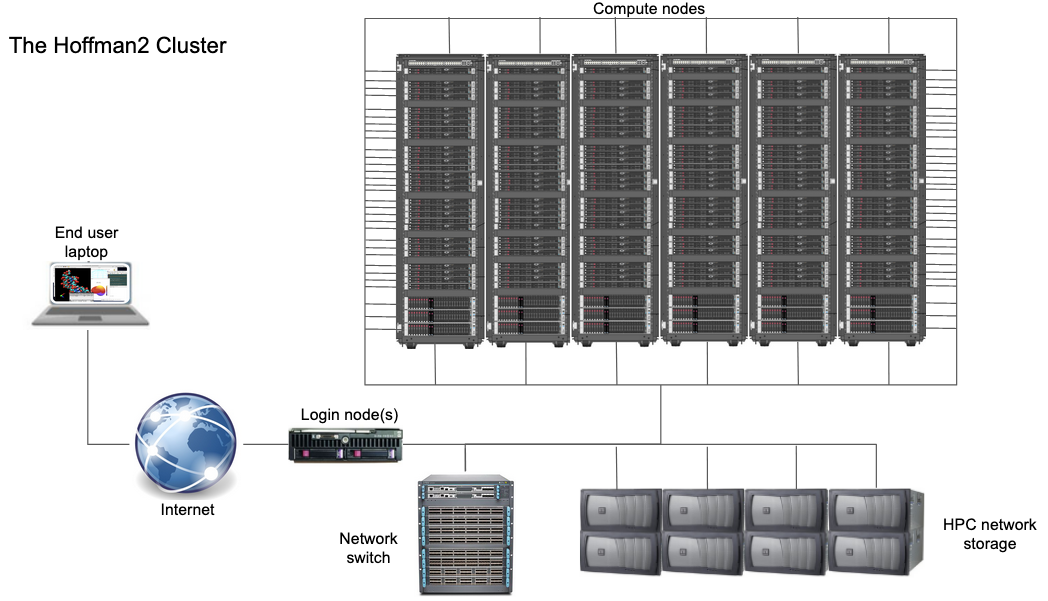

## The cluster at your fingertips


### What type of compute nodes by CPUs

In [ ]:
qhost -F arch | tail -n +4 | xargs -l2 | grep -v ^sge | awk '{print $12,$3}'  | awk -F = '{print $2}' | sort | uniq -c | awk 'BEGIN {print "CPU-type\t\t# nodes\t\t#cores/node\t# tot. cores"} {SUM_NODES +=$1; SUM_CORES +=$1*$3; {printf "%-16s %8d\t %8d\t\t %8d\n", $2,$1,$3,$1*$3}} END {print "TOTALS\t\t\t"SUM_NODES"\t\t-\t\t\t"SUM_CORES}'

 **NOTE**: qhost is a command that ask the scheduler which type of hosts are in the cluster

### What type of compute nodes by memory

In [ ]:
qhost -F arch | tail -n +4 | xargs -l2 | grep -v ^sge | awk '{print $12,$3,$8}'  | awk -F = '{print $2}' | sort | uniq -c | awk 'BEGIN {print "CPU-type\t\t# nodes\t\t#cores/node\t# tot. cores\t\tmemory/core (GB)\ttot memory (GB)"} {SUM_NODES +=$1; SUM_CORES +=$1*$3; SUM_MEM +=$4; {printf "%-16s %8d\t %8d\t\t %8d\t\t %.3f\t\t\t %.3f\n", $2,$1,$3,$1*$3,$4/$3,$4}} END {print "TOTALS\t\t\t"SUM_NODES"\t\t-\t\t\t"SUM_CORES"\t\t -\t\t\t"SUM_MEM}'

 **NOTE**: qhost is a command that ask the scheduler which type of hosts are in the cluster

### What type of compute nodes by GPUs

In [ ]:
PUBLIC_GPU_TYPES 

In [ ]:
cat /u/local/bin/PUBLIC_GPU_TYPES

## How to follow this presentation

You can of course just follow by listening to the presentation, but if you can try out various commands it will help build your skills on using the cluster.

To try out the various commands that will be showcased, in this presentation we assume that: 

- you already have an account on the Hoffman2 Cluster
- on your local computer you have access to a terminal and an SSH client or you have installed a remote desktop to connect to the cluster 


   To learn how to do so see: https://github.com/rdauria/HPC_at_UCLA/blob/main/INTRO_TO_H2C.ipynb

If you will be running this presentation as a jupyter notebook: 

- you should have python installed


   To learn how to do so see: https://github.com/rdauria/HPC_at_UCLA/blob/main/Jupyter-on-H2C.ipynb

### NOTE:  

- commands that you can cut and paste into your terminal may be **preceded** by (and **should not include**) the ``$`` which indicates the terminal prompt 

## Where is the slide deck for this presentartion?

Navigate to:

https://github.com/rdauria/HPC_at_UCLA

and look for:

https://github.com/rdauria/HPC_at_UCLA/InteractiveComputingonH2C.ipynb

## How to run this presentation on a terminal

If you use a [terminal and SSH to connect to the Hoffman2 Cluster](https://public.hoffman2.idre.ucla.edu/systems/5EHNT/INTRO_TO_H2C.slides.html#/12):

1. open a terminal on your local computer and SSH into the Hoffman2 Cluster with the command (substitute `joebruin` w/ your Hoffman2 user name):

   `$ ssh joebruin@hoffman2.idre.ucla.edu`

2. when applicable cut and paste the commands from the slides omitting the `$` character which is included to indicate the unix (or terminal) prompt

A summary of the commands is also available as a text file in:

`/u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/interactive-computing-on-H2C.txt`



## How to run this presentation from a remote desktop

If use a [remote desktop (NoMachine or X2Go)](https://public.hoffman2.idre.ucla.edu/systems/5EHNT/Connecting-via-remote-desktop-and-data-transfer.slides.html) to connect to the Hoffman2 Cluster

1. start a new connection (or reconnect to an existing suspended connection)
2. [open a terminal on the remote desktop](https://public.hoffman2.idre.ucla.edu/systems/5EHNT/Connecting-via-remote-desktop-and-data-transfer.slides.html#/4/5) 

You can then follow the same directions given for those connected via terminal and SSH
 
   - copy and paste from the slide deck any command given as for example:
   
     `$ ls`
     
     you would copy only the part after the `$` which is inserted here to mean the prompt.

## How to run this presentation as a jupyter notebook:

This presentation is a jupyter notebook, if you so choose you can run it following these steps:

1. open a terminal on your local computer (**DO NOT SSH INTO THE CLUSTER**)
2. download the python script h2jupy with the command:

    `$ curl -O https://raw.githubusercontent.com/rdauria/jupyter-notebook/main/h2jupynb`
    
   or:
   
    `$ wget https://raw.githubusercontent.com/rdauria/jupyter-notebook/main/h2jupynb`




## How to run this presentation as a jupyter notebook - cont'd:

3. run the script with, for example, if your Hoffman2 Cluster account is `joebruin` (substitute `joebruin` w/ your user name):

    `
    $ python h2jupynb -u joebruin -t 2 -m 5
    `

    or:

    `
    $ python3 h2jupynb -u joebruin -t 2 -m 5
    `
    

## How to run this presentation as a jupyter notebook - cont'd II:


4. when the jupyter notebook interface opens of your local browser, click on the `New` button and select `terminal`
5. when the terminal opens on your browser issue the command **(do not include the `$` sign)**:
    
    
`
$ cp /u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/InteractiveComputingonH2C.ipynb ./
`


6. navigate back to the Jupyter Notebook homepage and search for and double click on: 

    `InteractiveComputingonH2C.ipynb`


7. this presentation should open as a notebook

## Interactive computing

- if you log into the cluster via the script h2jupynb your session starts on a compute node and you will have the memory, runtime and cores that you have requested already reserved for you

- if you log into the cluster via terminal and SSH or a remote desktop your session starts on a login-type node and you will need to request an interactive session on a compute node via the command `qrsh` - in this session you will learn how to customize this request to fit your needs

### On which resources will your interactive session run?

https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#computational-resources-on-the-hoffman2-cluster

#### [Highp vs shared vs campus resources](https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#highp-vs-shared-vs-campus-jobs):

- `highp` refers to the use of group owned compute nodes
  - users can run jobs for up to 14 days
  - only for users in group who own resources
- `shared` refers to the use of temporarily unused group owned compute nodes
  - users can run jobs for up to 24 hours
  - only for users in group who own resources
- `campus` refers to compute nodes owned by OARC/IDRE and made available to the UCLA community
  - users can run jobs for up to 24 hours


## What computational resources do I have access to?

Open a terminal on the Hoffman2 Cluster and issue:

`$ myresources`
    
**if** the first line of your ouput contains:
    
`User joebruin is in the following resource group(s):  campus`
    
you do NOT have access to group-owned compute nodes and can only run for up to 24 hours on nodes owned by OARC/IDRE

**if** the first line of your output contains:
    
`User joebruin is in the following resource group(s):  gobruins evebruin`
    
you have access to the nodes purchased by groups: `gobruins` and `evebruin` and you can run for up to 24 hours on shared queues and for up to 14 days when requesting to run on owned resources (`highp` mode)

In [ ]:
# Do I have access to highp resources?
# if you are running this presentation as a jupyter notebook you can test your resources by running this cell:

myresources -u rdtest

## Do I have access to highp resources?

To find out paste in a terminal connected to the clster the command (omitting the `$` character indicative of the unix prompt):

`$ myresources`

what do you see?

## Working interactively on the Hoffman2 Cluster

Any work that will use substantial computational resources should be run on [compute nodes](https://public.hoffman2.idre.ucla.edu/systems/5EHNT/INTRO_TO_H2C.slides.html#/2) and not on the [login nodes](https://www.hoffman2.idre.ucla.edu/Policies/Role-of-the-login-nodes.html). 

To get an *interactive session* on one core of a compute node, from a terminal issue the following command(omitting the `$` character indicative of the unix prompt):

`
  $ qrsh
`
    
What happens?

(To terminate your interactive session, after the prompt returns, type: `Control` + `d` or `logout`)



**NOTE**: Interactive work on the Hoffman2 Cluster is one of the two ways you can run your simulations on the cluster, when possible a preferred way is to submit BATCH jobs (jobs that are executed off a script and do not need user interaction while they execute).

**HPC@UCLA: Batch Job Submission on H2C** May 28, 2024

## Working interactively on the Hoffman2 Cluster (Cont'd)

Customizing your interactive session. To **request**:

- a specific **runtime** of, for example, 12 hours, use: 
    
    `$ qrsh -l h_rt=12:00:00` 


- a specific amount of **memory**, for example 4GB, use:
   
   `$ qrsh -l h_data=4G`


- an **entire node** in exclusive mode (e.g., all of its cores and memory):
   
   `$ qrsh -l exclusive`
   
-  a **session on group-owned nodes** (check first if you have access with the command myresources):
   
   `$ qrsh -l highp`


- access to a GPU card:
  
  `$ qrsh -l gpu,cuda=1`
  

See also: https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#examples-of-how-to-request-resources



## Working interactively on the Hoffman2 Cluster - multiple cores

Customizing your interactive session. To request multiple computing cores: 

- from the same node (server), use, for example to request 8 cores:
    
    `$ qrsh -pe shared 8`


- across multiple nodes (servers), use, for example to request 42 cores:
    
    `$ qrsh -pe dc* 42`


See also: https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#requesting-multiple-cores

## Working interactively on the Hoffman2 Cluster - Examples

Putting it all together a few examples:

- To request an interactive session for 1 hour with 4GB per core and 6 cores on the same node:
    
    `$ qrsh -l h_rt=1:00:00,h_data=4G -pe shared 6`


- To request an interactive session for 2 hours with 3GB per core and 48 cores across any node:
    
    `$ qrsh -l h_rt=2:00:00,h_data=3G -pe dc* 48`
    

## What GPU cards are available and how to request them

https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#gpu-access

GPU cards available to all Hoffman2 users:

| GPU type      | Compute capability | No. of CUDA cores | Global memory size |
| ------------- | ------------------ | ----------------- | ------------------ |
| A100          | 8.0                | 6912              | 80GB               |
| V100          | 7.0                | 5120              | 32 GB              |
| RTX2080Ti     | 7.5                | 4352              | 10 GB              |
| P4            | 6.1                | 2560              |  8 GB              |




## What GPU cards are available and how to request them (Cont'd)

https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#gpu-access

Scheduler options to request specific GPU cards:

| GPU type      |   scheduler options       | 
|---------------|---------------------------|
| A100          |   -l gpu,A100,cuda=1      |
| V100          |   -l gpu,V100,cuda=1      |
| RTX2080Ti     |   -l gpu,RTX2080Ti,cuda=1 |
| P4            |   -l gpu,P4,cuda=1        |

E.g. to request a session on a specific GPU card issue at the command prompt:

`$ qrsh -l gpu,P4,cuda=1,h_rt=3:00:00`


**NOTE**: GPU cards are a hot commodity and you may need to wait for a while!

## When will my interactive session start?

Very many jobs are constantly running on the cluster... how many?


In [ ]:
#first four jobs queuing (status "p" pending):

qstat -s p | head -n 6

In [ ]:
# tot. no. of currently jobs pending 

qstat -s p | grep qw | wc -l

In [ ]:
#Let's count the total number of compute cores requested using some handy command line expressions:

count=1; qstat -s p | grep qw | awk -v count=$count '{count=count+$8} END {print "Total no. of cores requested: "count}'

## How many running jobs?

In [ ]:
#first four jobs running (status "r" running):

qstat -s r | head -n 6

In [ ]:
# tot. no. of jobs running

qstat -s r | grep r | wc -l

In [ ]:
#Let's count the total number of compute cores currently running jobs using some handy command line expressions: 

count=1 ; val=0 ; qstat -s r | grep @ | awk -v count=$count '{count=count+$9} END {print "Total no. of cores in use: "count}'


## How to check the status of GPU nodes

To see all the CUDA GPU nodes (you may not have access to all) and their running jobs, issue at the command line:


`$ qhost -l cuda.0.name=* -q -j`

In [ ]:
qhost -l cuda.0.name=* -q -j

## What applications/software is already available on Hoffman2?

Refer to: https://www.hoffman2.idre.ucla.edu/Using-H2/Software/Software.html

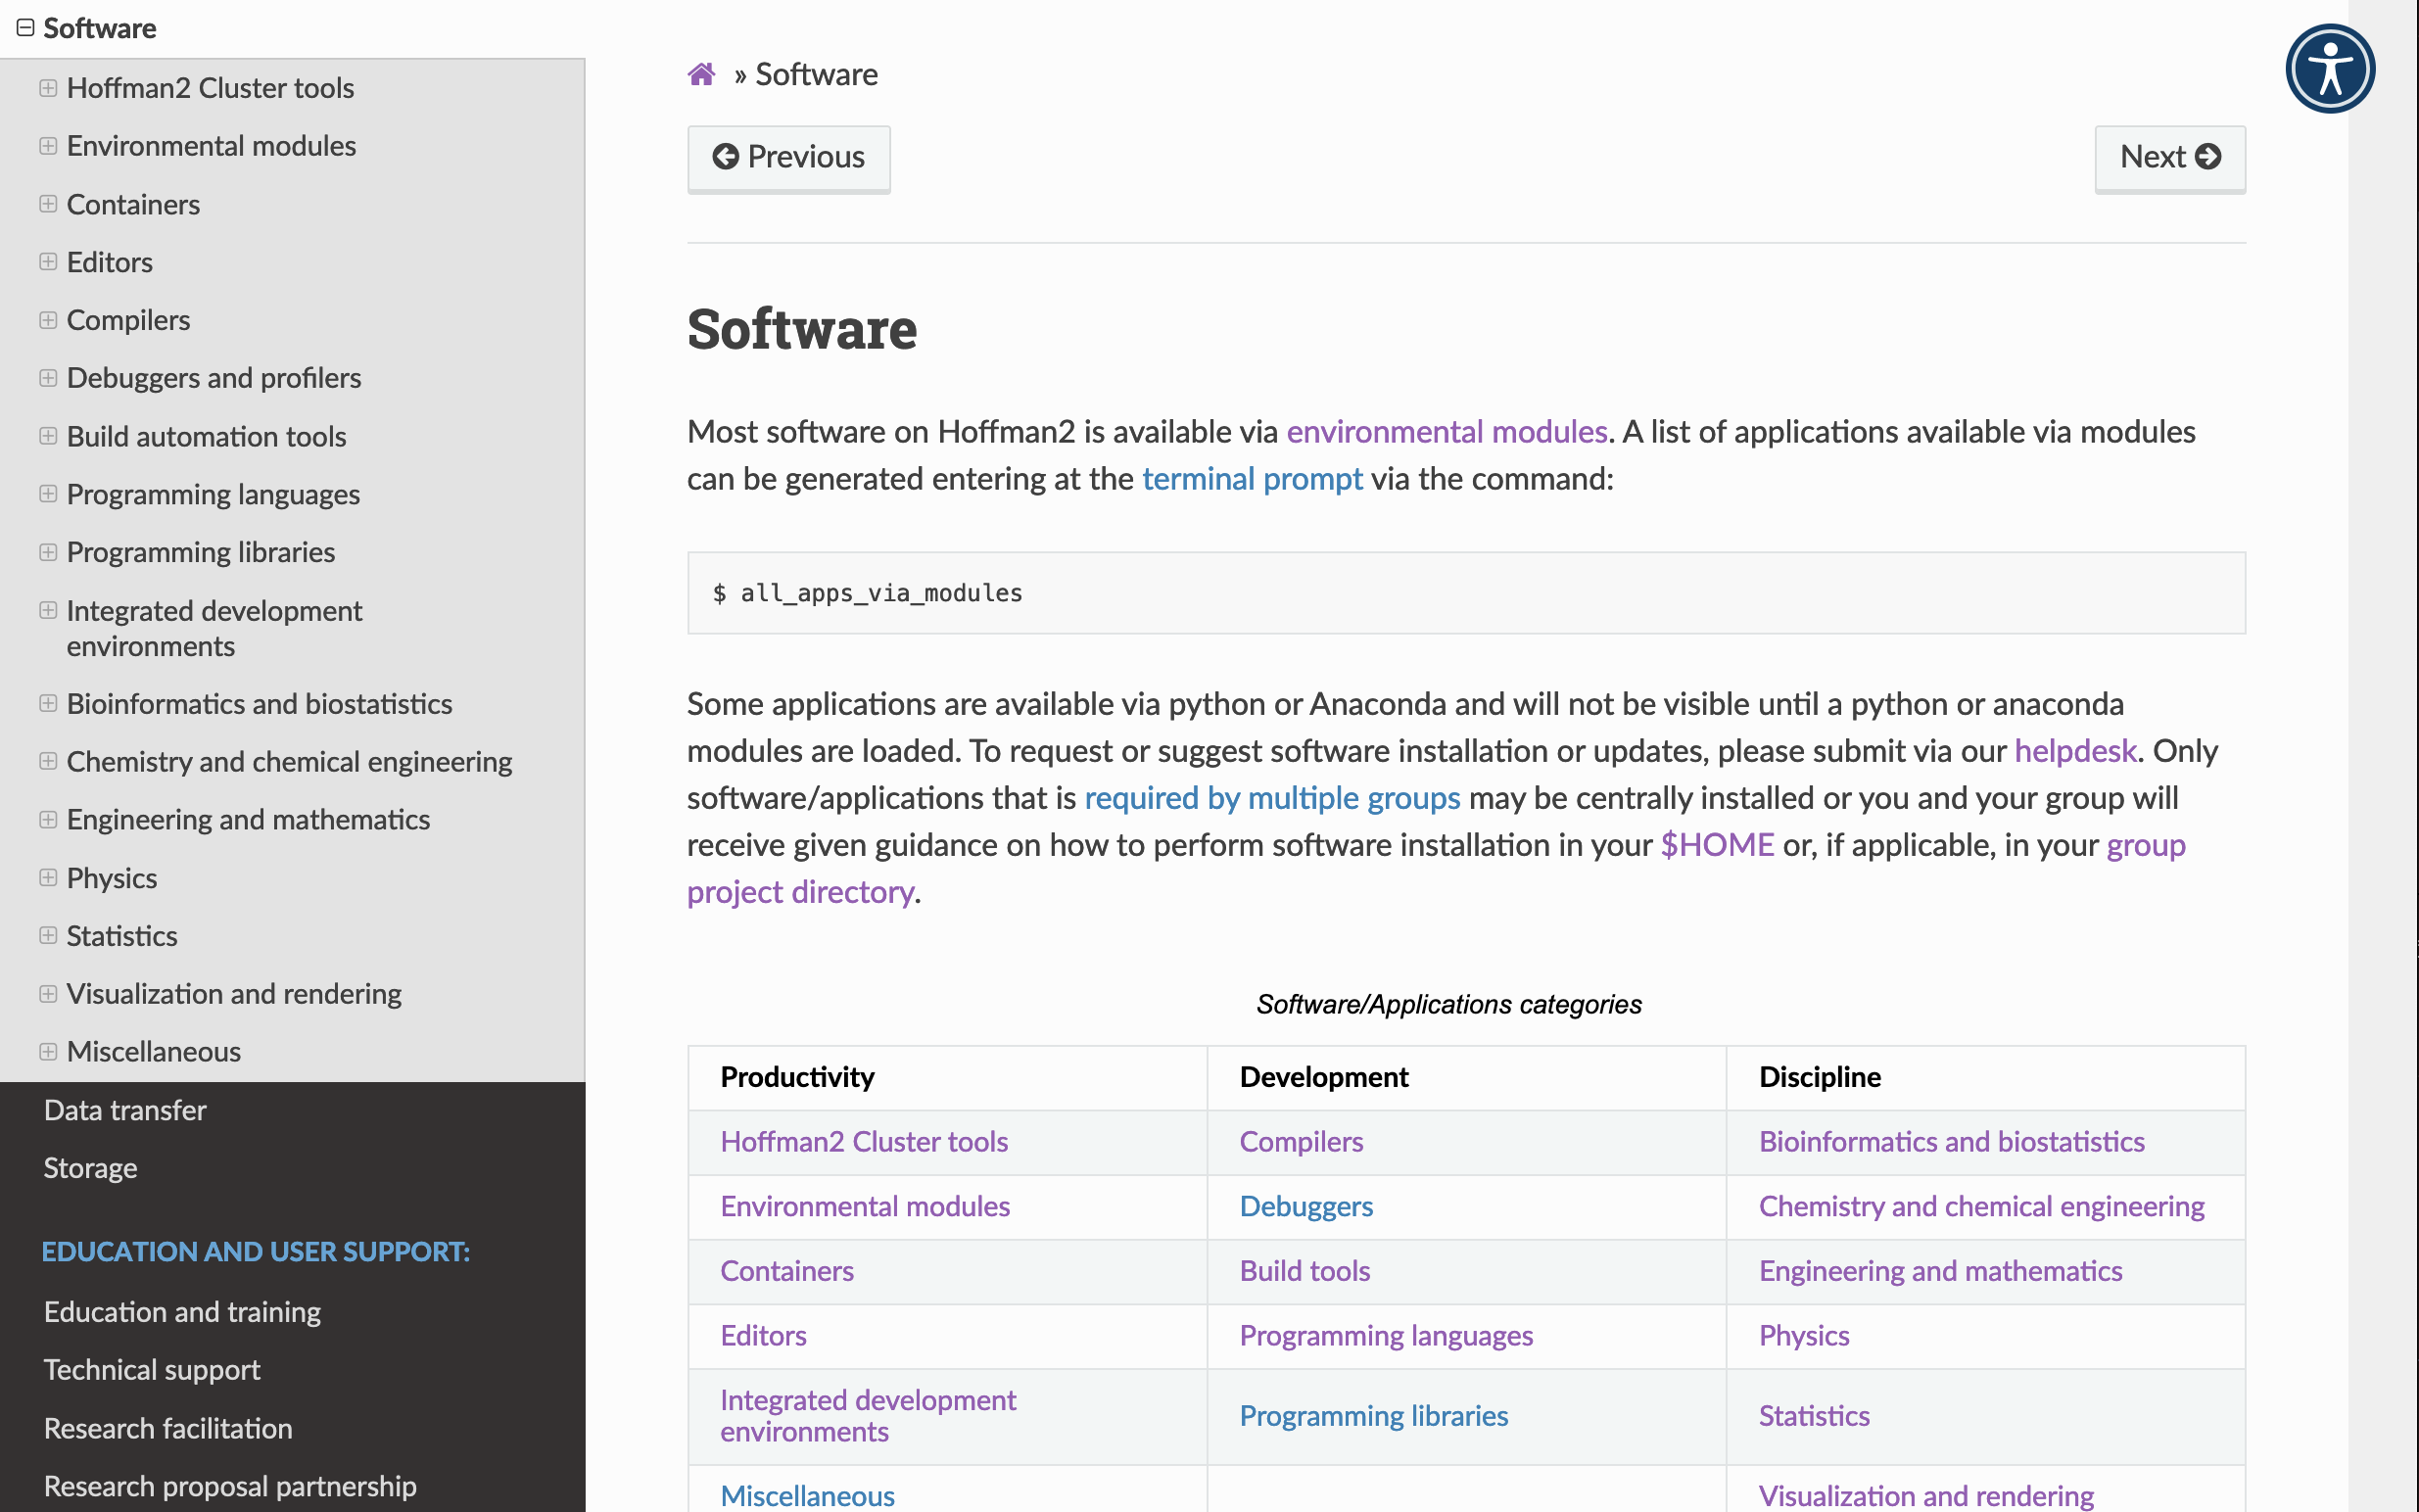

### Apps available via modules

To see what applications are available in the current hierarchy, at a terminal connected to Hoffman2 issue the command:

`$ module av  # press enter to scroll down and exit the view`

To look for a specific software, for example R, issue the command:

`$ modules_lookup -m R`



In [ ]:
## Most centrally installed apps are available via `modulefiles` 
## (if you are running this presentation as a jupyter notebook execute this cell):

    module av --no-pager

In [ ]:
## Most centrally installed apps are available via `modulefiles` to look for a specifc software use `modules_lookup`
## (if you are running this presentation as a jupyter notebook execute this cell):

    modules_lookup

In [ ]:
## To look for a specific appliaction say R
## (if you are running this presentation as a jupyter notebook execute this cell
## or paste the command in your terminal):

modules_lookup -m R

## Load an application in your environment:

`$ which R`

`$ module load gcc/10.2.0; module load R/4.3.0`

`$ which R`

In [ ]:
## Load an application in your environment - continued:
## (if you are running this presentation as a jupyter notebook execute this cell
## or paste the command in your terminal):
which R


In [ ]:
module load gcc/10.2.0; module load R/4.4.0


In [ ]:
which R

## Finding the right python for you


`$ which python`

`$ python --version`

`$ module av python anaconda mamba`

`$ module load python/3.9.6`

`$ which python`

`$ python --version`

`$ module unload python/3.9.6; module load mamba`

`$ which python`

`$ python --version`

**NOTE**: no need to initialize anaconda or mamba!!!

In [ ]:
which python

In [ ]:
python --version

In [ ]:
module av python anaconda mamba

In [ ]:
module load python/3.9.6

In [ ]:
which python

In [ ]:
python --version

In [ ]:
module unload python/3.9.6; module load mamba

In [ ]:
module li

In [ ]:
which python

In [ ]:
python --version

In [ ]:
module unload mamba

In [ ]:
which python

## Creation of conda/mamba virtual environments

**NOTE:** Activation of a python environment does not work from within a notebook but you can install ipykernl in the newly created environment so that it will appear in hte list of kernels available in your jupyter session

**on a terminal** you will need to:
    
    
   `qrsh -l h_data=5G`
   
   `module load mamba`

   `echo y| conda create --name mynewenv`

   `conda activate mynewenv`

   `echo y | conda install ipykernel`
   
   `python -m ipykernel install --user --name "mynewenv" --display-name "mynewenv"`

## Look for applications on H2C 

`$ ls /u/local/apps`

In [ ]:
ls /u/local/apps